In [1]:
 pip install livelossplot

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
from glob import glob
from PIL import Image
import numpy as np
import pandas as pd
import cv2
import random
import albumentations as A
import keras
import matplotlib.cm as cm
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
from livelossplot.inputs.keras import PlotLossesCallback
from keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from tensorflow.keras import layers, models
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score, precision_score, f1_score

With the csv file Example & on dataset 2


In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt

import cv2
from tqdm import tqdm
import io
import seaborn as sns

from sklearn.utils import shuffle # Shuffle arrays or sparse matrices in a consistent way
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.applications import DenseNet121
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard,ModelCheckpoint

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


import ipywidgets as widgets
from PIL import Image
from IPython.display import display, clear_output

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Activation, Dropout,Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Lambda, Input, AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import shutil
import cv2
import os

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import warnings
warnings.filterwarnings("ignore")

## Define Labels

In [9]:
labels = ['COVID', 'Normal']

In [10]:
X_train = [] #Training Dataset
Y_train = [] #Training Labels

image_size=224

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/COVID-19_Radiography_Dataset',  i)
    for j in tqdm(os.listdir(folderPath)):
        image = cv2.imread(os.path.join(folderPath, j))
        image = cv2.resize(image, (image_size, image_size))
        X_train.append(image)
        Y_train.append(i)



# converted into array

Xtrain = np.array(X_train)
Ytrain = np.array(Y_train)

100%|██████████| 10192/10192 [03:21<00:00, 50.50it/s] 


In [11]:
Xtrain.shape

(13838, 224, 224, 3)

In [12]:
Ytrain.shape

(13838,)

In [13]:
Xtrain,Ytrain = shuffle(Xtrain, Ytrain, random_state=42)

## Train test split which is divided train dataset and validation dataset

In [14]:
xtrain,xtest, ytrain,ytest = train_test_split(Xtrain, Ytrain,test_size=0.2, random_state=42)

In [15]:
xtrain.shape

(11070, 224, 224, 3)

In [16]:
ytrain.shape

(11070,)

In [17]:
xtest.shape

(2768, 224, 224, 3)

In [ ]:
ytest.shape

(4240,)

## Converting labels into One hot encoder

In [18]:
ytrain_new = []
ytest_new = []

for i in ytrain:
    ytrain_new.append(labels.index(i))#Converting String Label to integer i.e

ytrain = to_categorical(ytrain_new) #Converts a class vector (integers) to binary class matrix

for i in ytest:
    ytest_new.append(labels.index(i))

ytest = to_categorical(ytest_new)

In [19]:
ytrain.shape

(11070, 2)

In [20]:
ytest.shape

(2768, 2)

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Reading

import os
from glob import glob
from PIL import Image

# Data Processing

import numpy as np
import pandas as pd
import cv2
import random
import albumentations as A

# Data Analysis

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Data Modeling & Model Evaluation

from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from tensorflow.keras import layers, models
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score, precision_score, f1_score

# Grad-CAM

import keras
import matplotlib.cm as cm

# DENSENET MODEL

In [21]:
image_size = 224

In [22]:
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(image_size, image_size, 3))

29084464/29084464 [==============================] - 1s 0us/step


In [23]:
# Output of model

model = model_d.output
model = tf.keras.layers.AveragePooling2D(pool_size=(4, 4))(model)
model = tf.keras.layers.Flatten(name="flatten")(model)
model = tf.keras.layers.Dense(128, activation="relu")(model)
model = tf.keras.layers.Dropout(0.6)(model)
model = tf.keras.layers.Dense(2, activation='softmax')(model)
model = tf.keras.models.Model(inputs=model_d.input, outputs=model)

In [24]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc')
]

In [25]:
model.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=METRICS)

In [26]:
#es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)

#tf.random.set_seed(42)
history = model.fit(xtrain,ytrain,
                        epochs = 50,
                        validation_data = (xtest,ytest))

Epoch 1/50
346/346 [==============================] - 127s 149ms/step - loss: 0.2013 - accuracy: 0.9229 - precision: 0.9229 - recall: 0.9229 - auc: 0.9758 - val_loss: 0.2428 - val_accuracy: 0.9274 - val_precision: 0.9274 - val_recall: 0.9274 - val_auc: 0.9725
Epoch 2/50
346/346 [==============================] - 46s 132ms/step - loss: 0.0961 - accuracy: 0.9677 - precision: 0.9677 - recall: 0.9677 - auc: 0.9931 - val_loss: 0.1501 - val_accuracy: 0.9426 - val_precision: 0.9426 - val_recall: 0.9426 - val_auc: 0.9876
Epoch 3/50
346/346 [==============================] - 45s 131ms/step - loss: 0.0609 - accuracy: 0.9786 - precision: 0.9786 - recall: 0.9786 - auc: 0.9972 - val_loss: 2.3753 - val_accuracy: 0.7908 - val_precision: 0.7908 - val_recall: 0.7908 - val_auc: 0.8433
Epoch 4/50
346/346 [==============================] - 45s 130ms/step - loss: 0.0654 - accuracy: 0.9784 - precision: 0.9784 - recall: 0.9784 - auc: 0.9964 - val_loss: 0.1514 - val_accuracy: 0.9415 - val_precision: 0.9415 - 

In [27]:
import pandas as pd

# Assuming 'history1' is the History object returned from model.fit()
metrics = pd.DataFrame(history.history)

# Save the training history to a CSV file
metrics.to_csv('/content/sample_data/DENSE_B224.csv', index=False)

# Save the model itself
model.save('/content/sample_data/DENSE_B224.h5')

In [28]:
pred = model.predict(xtest)
pred = np.argmax(pred, axis=1)
actual_label = np.argmax(ytest, axis=1)
print(classification_report(actual_label, pred , target_names = labels))

87/87 [==============================] - 4s 29ms/step
              precision    recall  f1-score   support

       COVID       0.94      0.99      0.97       717
      Normal       1.00      0.98      0.99      2051

    accuracy                           0.98      2768
   macro avg       0.97      0.98      0.98      2768
weighted avg       0.98      0.98      0.98      2768



In [29]:
accuracy_score(actual_label, pred)

0.9819364161849711

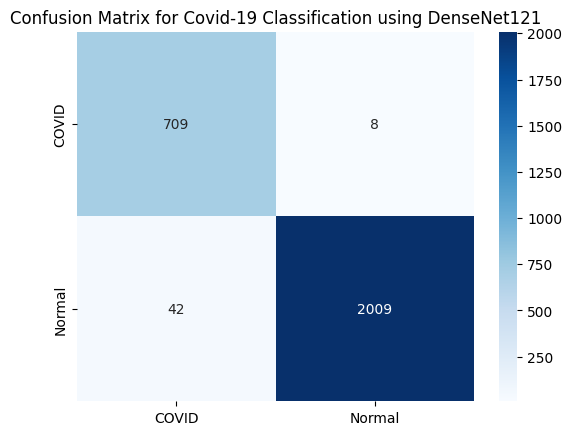

In [30]:
Cm=confusion_matrix(actual_label,pred)
ax=plt.axes()
sns.heatmap(Cm, cmap='Blues' ,annot=True,fmt='d',
           annot_kws={'size':10},
           xticklabels=labels,
           yticklabels=labels,
           ax=ax
           )

plt.title("Confusion Matrix for Covid-19 Classification using DenseNet121")
plt.savefig('densenet_confusion.png', dpi=300) # Save plot as PNG
plt.show()

## Loss and Accuracy Measurement graph

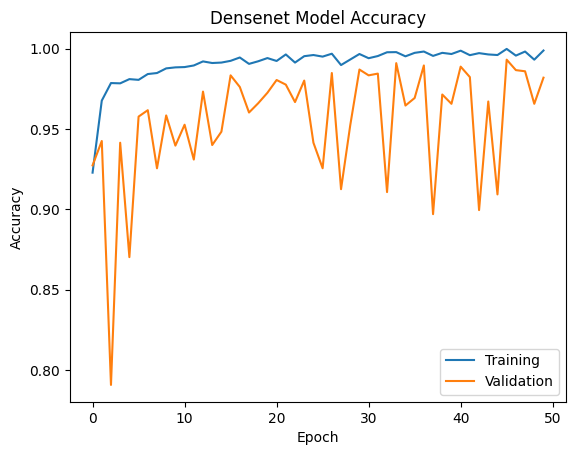

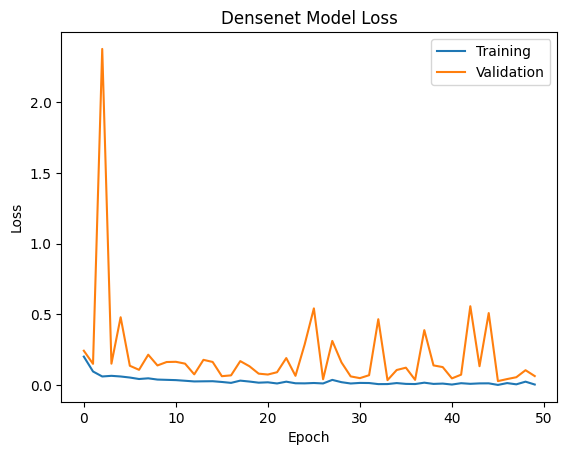

In [31]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Densenet Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.savefig('densenet_accuracy.png', dpi=300) # Save plot as PNG
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Densenet Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.savefig('densenet_loss.png', dpi=300) # Save plot as PNG
plt.show()

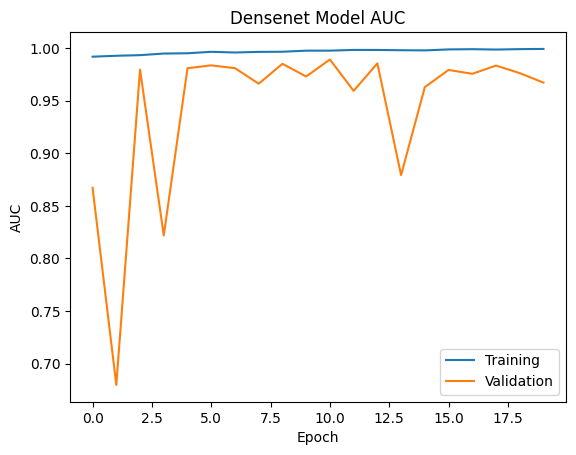

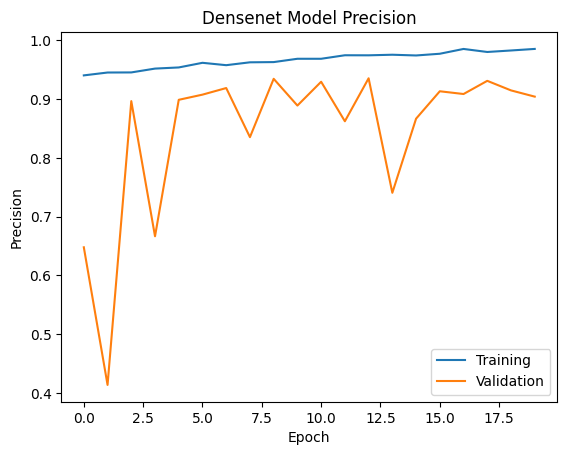

In [ ]:
# Plot the training and validation auc
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Densenet Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(['Training', 'Validation'])
plt.savefig('densenet_auc.png', dpi=300) # Save plot as PNG
plt.show()

# Plot the training and validation precision
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Densenet Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(['Training', 'Validation'])
plt.savefig('densenet_precision.png', dpi=300) # Save plot as PNG
plt.show()

## CNN MODEL

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers
image_size = 150
model1 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

In [38]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', input_shape = (224, 224, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.3))

cnn_model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.5))

cnn_model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(units = 16, activation = 'relu'))
cnn_model.add(layers.Dropout(0.2))

cnn_model.add(layers.Dense(units = 2))

cnn_model.compile(optimizer = 'adam',
           loss = 'categorical_crossentropy',
           metrics=METRICS)

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2,activation='softmax'))
#model2.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

In [34]:
#Create the model
cnn=Sequential()
#initially 64 convolution nodes
cnn.add(Conv2D(64,(3,3),padding="same",activation='relu',input_shape=(image_size, image_size, 3)))
#add a Max Pooling layer
cnn.add(MaxPooling2D())
#another 32 convolution nodes
cnn.add(Conv2D(32,(3,3),padding="same",activation='relu'))
#Add a max pooling
cnn.add(MaxPooling2D())
#Add 32 convolutions
cnn.add(Conv2D(32,(2,2),padding="same",activation='relu'))
#Add a max pooling
cnn.add(MaxPooling2D())
#Flatten before adding fully connected layer
cnn.add(Flatten())
#Add a hidden layer with 100 nodes
cnn.add(Dense(100,activation='relu'))
#Add another hidden layer with 50 nodes
cnn.add(Dense(50,activation='relu'))
#Add final output layer with 4 output nodes using softmax
cnn.add(Dense(2,activation='softmax'))

In [35]:
cnn.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=METRICS)

In [ ]:
model2.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=METRICS)

In [ ]:
model16.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=METRICS)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

Physical devices cannot be modified after being initialized


In [39]:
history2=cnn_model.fit(xtrain,ytrain,epochs=50,validation_data=(xtest,ytest))

174/346 [==============>...............] - ETA: 11s - loss: 4.3104 - accuracy: 0.6824 - precision: 0.7300 - recall: 0.5788 - auc: 0.6711

KeyboardInterrupt: ignored

In [47]:
import pandas as pd

# Assuming 'history1' is the History object returned from model.fit()
metrics = pd.DataFrame(history2.history)

# Save the training history to a CSV file
metrics.to_csv('/content/sample_data/CNN2.csv', index=False)

# Save the model itself
cnn_model.save('/content/sample_data/CNN_B224.h5')


In [37]:
pred1 = cnn.predict(xtest)
pred1 = np.argmax(pred1, axis=1)
actual_label1 = np.argmax(ytest, axis=1)
print(classification_report(actual_label1, pred1 , target_names = labels))

87/87 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

       COVID       0.89      0.93      0.91       717
      Normal       0.98      0.96      0.97      2051

    accuracy                           0.95      2768
   macro avg       0.93      0.95      0.94      2768
weighted avg       0.95      0.95      0.95      2768



In [40]:
pred1 = cnn.predict(xtest)
pred1 = np.argmax(pred1, axis=1)
actual_label1 = np.argmax(ytest, axis=1)
print(classification_report(actual_label1, pred1 , target_names = labels_final))

87/87 [==============================] - 0s 5ms/step


NameError: ignored

In [ ]:
accuracy_score(actual_label1, pred1)

0.8226415094339623

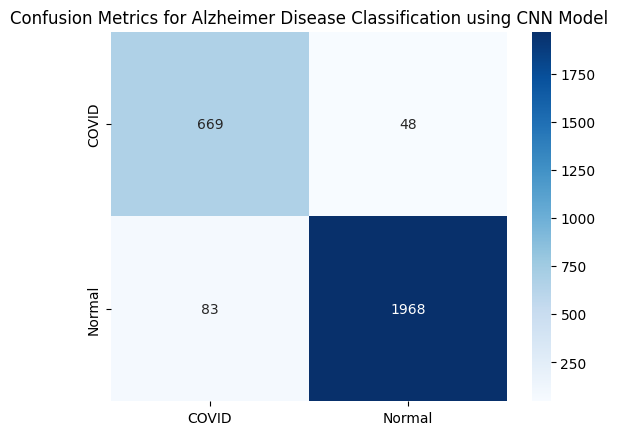

In [42]:
Cm1=confusion_matrix(actual_label1,pred1)
ax1=plt.axes()
sns.heatmap(Cm1, cmap='Blues' ,annot=True,fmt='d',
           annot_kws={'size':10},
           xticklabels=labels,
           yticklabels=labels,
           ax=ax1
           )

plt.title("Confusion Matrix for Covid-19 detection using CNN Model")
plt.savefig('cnn_confusion.png', dpi=300) # Save plot as PNG
plt.show()

## Loss and Accuracy Measurement Graph - CNN Model

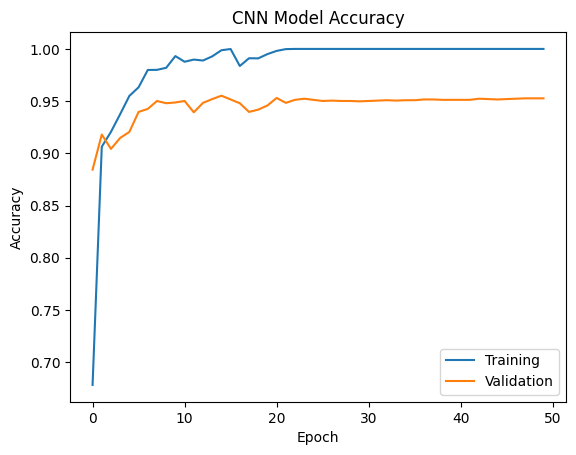

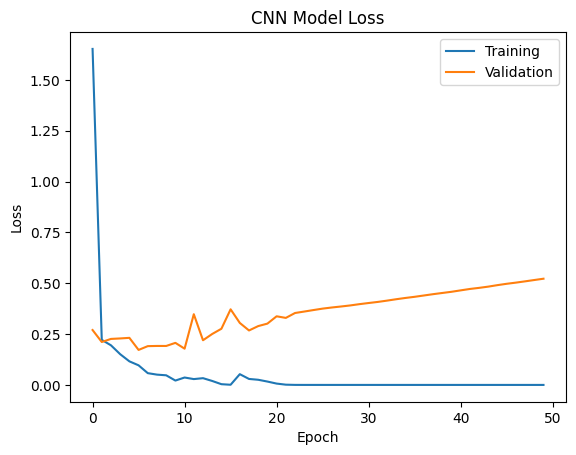

In [44]:
# Plot the training and validation accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.savefig('cnn_accuracy.png', dpi=300) # Save plot as PNG
plt.show()

# Plot the training and validation loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.savefig('cnn_loss.png', dpi=300) # Save plot as PNG
plt.show()

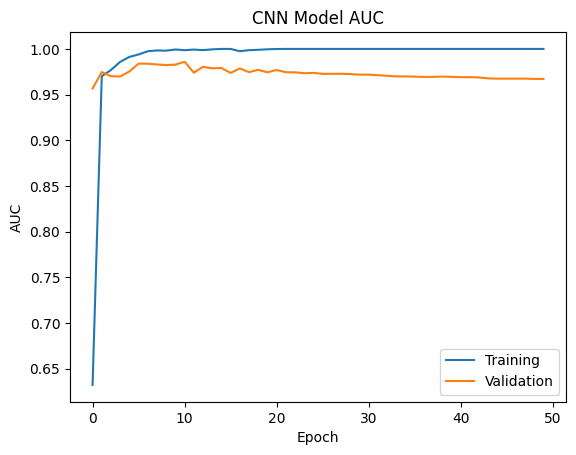

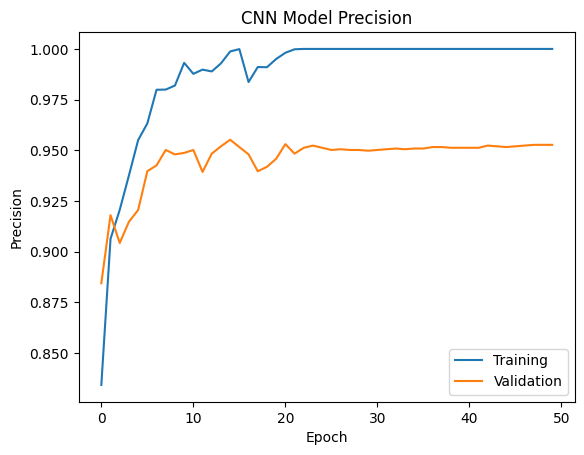

In [45]:
# Plot the training and validation auc
plt.plot(history2.history['auc'])
plt.plot(history2.history['val_auc'])
plt.title('CNN Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(['Training', 'Validation'])
plt.savefig('cnn_auc.png', dpi=300) # Save plot as PNG
plt.show()

# Plot the training and validation precision
plt.plot(history2.history['precision'])
plt.plot(history2.history['val_precision'])
plt.title('CNN Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(['Training', 'Validation'])
plt.savefig('cnn_precision.png', dpi=300) # Save plot as PNG
plt.show()

## Efficient NetB7 Model

In [48]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [49]:
image_size = 224

In [50]:
inceptionv3 = InceptionV3(include_top=False,weights='imagenet',input_shape=(image_size, image_size, 3))

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
from tensorflow.keras.applications import EfficientNetB7

In [ ]:
efficientnetB7= EfficientNetB7(include_top=False,weights='imagenet',input_shape=(image_size, image_size, 3))

258076736/258076736 [==============================] - 9s 0us/step


In [96]:
# Output of model

model3 = inceptionv3.output
model3 = tf.keras.layers.GlobalAveragePooling2D()(model3)
model3 = tf.keras.layers.Dropout(0.5)(model3)
model3 = tf.keras.layers.Dense(2, activation='softmax')(model3)
model3 = tf.keras.models.Model(inputs=inceptionv3.input, outputs=model3)

In [97]:
model3.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=METRICS)

In [98]:
history3 = model3.load_weights('/content/sample_data/InceptionV3.h5')

In [54]:
history3=model3.fit(xtrain,ytrain,epochs=50,validation_data=(xtest,ytest))

Epoch 1/50
346/346 [==============================] - 72s 106ms/step - loss: 0.1472 - accuracy: 0.8576 - precision: 0.8844 - recall: 0.8228 - auc: 0.8539 - val_loss: 0.1996 - val_accuracy: 0.9404 - val_precision: 0.9404 - val_recall: 0.9404 - val_auc: 0.9809
Epoch 2/50
346/346 [==============================] - 32s 93ms/step - loss: 0.0662 - accuracy: 0.9771 - precision: 0.9771 - recall: 0.9771 - auc: 0.9964 - val_loss: 0.2659 - val_accuracy: 0.8790 - val_precision: 0.8790 - val_recall: 0.8790 - val_auc: 0.9567
Epoch 3/50
346/346 [==============================] - 32s 93ms/step - loss: 0.0540 - accuracy: 0.9817 - precision: 0.9817 - recall: 0.9817 - auc: 0.9976 - val_loss: 0.0914 - val_accuracy: 0.9617 - val_precision: 0.9617 - val_recall: 0.9617 - val_auc: 0.9946
Epoch 4/50
346/346 [==============================] - 32s 93ms/step - loss: 0.0382 - accuracy: 0.9874 - precision: 0.9874 - recall: 0.9874 - auc: 0.9988 - val_loss: 0.2395 - val_accuracy: 0.9220 - val_precision: 0.9220 - val_

In [ ]:
history3 = model3.load_weights('/content/sample_data/InceptionV3.h5')

ValueError: ignored

In [ ]:
import pickle

with open('/content/drive/MyDrive/efficientb7_history.pkl', 'rb') as f:
    history2 = pickle.load(f)


In [99]:
pred3 = model3.predict(xtest)
pred3 = np.argmax(pred3, axis=1)
actual_label3 = np.argmax(ytest, axis=1)
print(classification_report(actual_label3, pred3,target_names = labels))

87/87 [==============================] - 3s 24ms/step
              precision    recall  f1-score   support

       COVID       0.99      0.98      0.98       717
      Normal       0.99      1.00      0.99      2051

    accuracy                           0.99      2768
   macro avg       0.99      0.99      0.99      2768
weighted avg       0.99      0.99      0.99      2768



In [100]:
accuracy_score(actual_label3, pred3)

0.9913294797687862

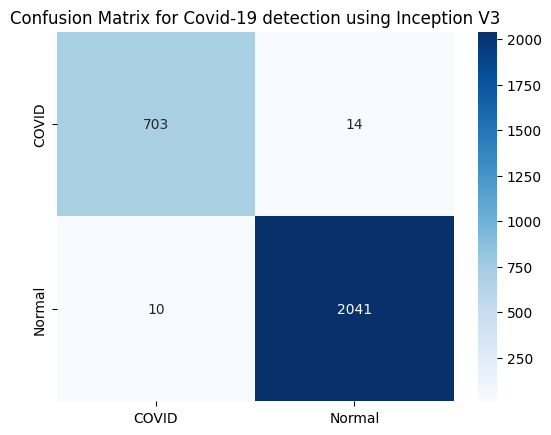

In [59]:
Cm2=confusion_matrix(actual_label3,pred3)
ax2=plt.axes()
sns.heatmap(Cm2, cmap='Blues' ,annot=True,fmt='d',
           annot_kws={'size':10},
           xticklabels=labels,
           yticklabels=labels,
           ax=ax2
           )

plt.title("Confusion Matrix for Covid-19 detection using Inception V3")
plt.savefig('netb7_confusion.png', dpi=300) # Save plot as PNG
plt.show()

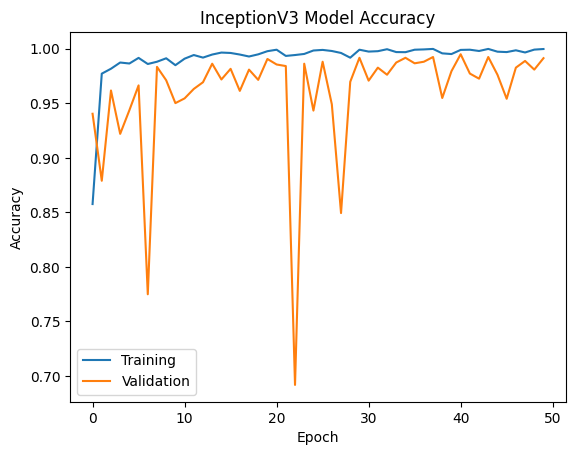

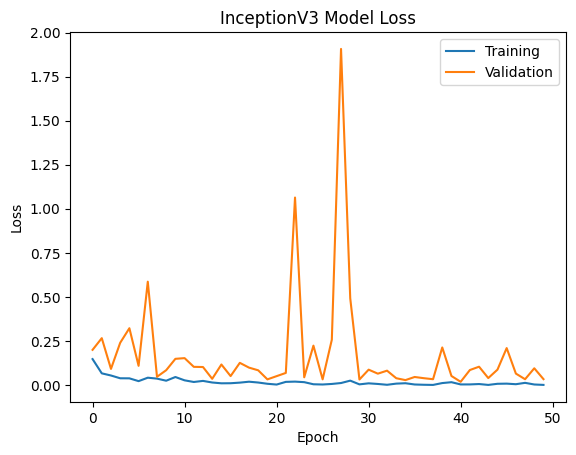

In [60]:
# Plot the training and validation accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('InceptionV3 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.savefig('InceptionV3.png', dpi=300) # Save plot as PNG
plt.show()

# Plot the training and validation loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('InceptionV3 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.savefig('InceptionV3.png', dpi=300) # Save plot as PNG
plt.show()

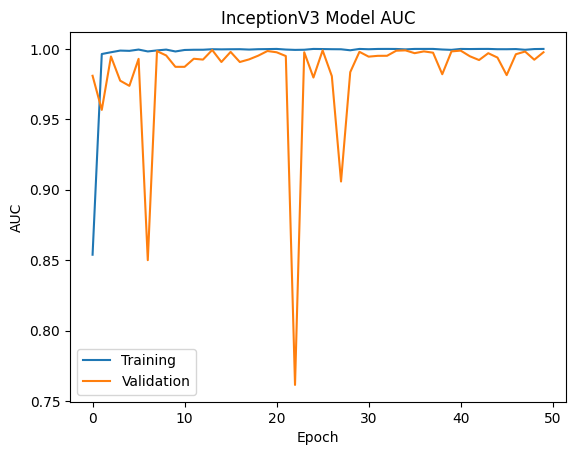

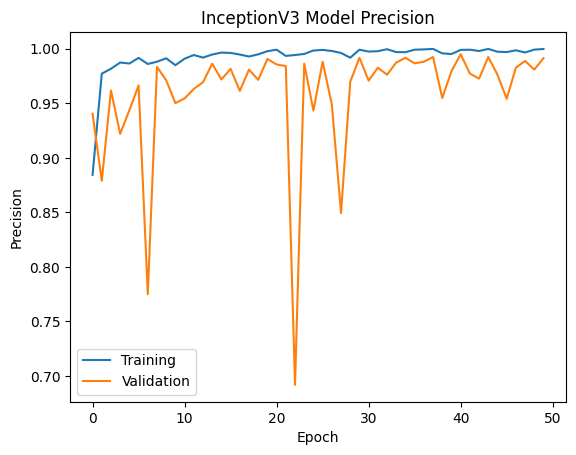

In [61]:
# Plot the training and validation auc
plt.plot(history3.history['auc'])
plt.plot(history3.history['val_auc'])
plt.title('InceptionV3 Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(['Training', 'Validation'])
plt.savefig('InceptionV3_auc.png', dpi=300) # Save plot as PNG

plt.show()

# Plot the training and validation precision
plt.plot(history3.history['precision'])
plt.plot(history3.history['val_precision'])
plt.title('InceptionV3 Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(['Training', 'Validation'])
plt.savefig('InceptionV3_precision.png', dpi=300) # Save plot as PNG
plt.show()

In [64]:
import pandas as pd

# Assuming 'history1' is the History object returned from model.fit()
metrics = pd.DataFrame(history3.history)

# Save the training history to a CSV file
metrics.to_csv('/content/sample_data/InceptionV3.csv', index=False)

# Save the model itself
model3.save('/content/sample_data/InceptionV3.h5')

# VGG19 MODEL

In [66]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights='imagenet',
            include_top = False,input_shape=(image_size, image_size, 3)
           )
for layer in vgg.layers:
    layer.trainable = False
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model4 = Sequential()
model4.add(vgg)
model4.add(Flatten())
model4.add(Dense(2,activation="softmax"))
#model.summary()

## Compile VGG19 Model

In [67]:
model4.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=METRICS)

In [69]:
history4=model4.fit(xtrain,ytrain,epochs=50,validation_data=(xtest,ytest))

Epoch 1/50
346/346 [==============================] - 23s 66ms/step - loss: 0.6976 - accuracy: 0.9678 - precision: 0.9678 - recall: 0.9678 - auc: 0.9732 - val_loss: 0.7688 - val_accuracy: 0.9711 - val_precision: 0.9711 - val_recall: 0.9711 - val_auc: 0.9766
Epoch 2/50
346/346 [==============================] - 20s 58ms/step - loss: 0.3636 - accuracy: 0.9841 - precision: 0.9841 - recall: 0.9841 - auc: 0.9880 - val_loss: 0.8121 - val_accuracy: 0.9729 - val_precision: 0.9729 - val_recall: 0.9729 - val_auc: 0.9773
Epoch 3/50
346/346 [==============================] - 20s 58ms/step - loss: 0.2447 - accuracy: 0.9885 - precision: 0.9885 - recall: 0.9885 - auc: 0.9912 - val_loss: 0.9854 - val_accuracy: 0.9765 - val_precision: 0.9765 - val_recall: 0.9765 - val_auc: 0.9796
Epoch 4/50
346/346 [==============================] - 20s 57ms/step - loss: 0.2011 - accuracy: 0.9892 - precision: 0.9892 - recall: 0.9892 - auc: 0.9917 - val_loss: 1.2286 - val_accuracy: 0.9697 - val_precision: 0.9697 - val_r

In [ ]:
history3 = model3.load_weights('/kaggle/input/model-training/Model Training/vgg19.h5')

In [ ]:
import pickle

with open('/kaggle/input/model-training/Model Training/vgg19_history.pkl', 'rb') as f:
    history3 = pickle.load(f)


In [93]:
pred4 = model4.predict(xtest)
pred4 = np.argmax(pred4, axis=1)
actual_label4 = np.argmax(ytest, axis=1)
print(classification_report(actual_label4, pred4, target_names = labels))

87/87 [==============================] - 4s 43ms/step
              precision    recall  f1-score   support

       COVID       0.97      0.94      0.96       717
      Normal       0.98      0.99      0.99      2051

    accuracy                           0.98      2768
   macro avg       0.98      0.97      0.97      2768
weighted avg       0.98      0.98      0.98      2768



In [95]:
accuracy_score(actual_label4, pred4)

0.9790462427745664

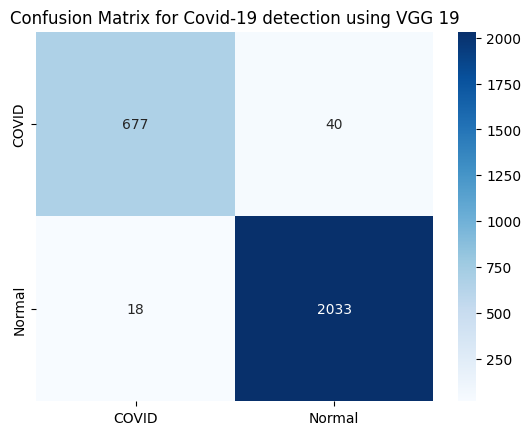

In [72]:
Cm3=confusion_matrix(actual_label4,pred4)
ax3=plt.axes()
sns.heatmap(Cm3, cmap='Blues' ,annot=True,fmt='d',
           annot_kws={'size':10},
           xticklabels=labels,
           yticklabels=labels,
           ax=ax3
           )

plt.title("Confusion Matrix for Covid-19 detection using VGG 19")
plt.savefig('vgg19_confusion.png', dpi=300) # Save plot as PNG
plt.show()

## Loss and Accuracy Measurement Graph - VGG19 Model

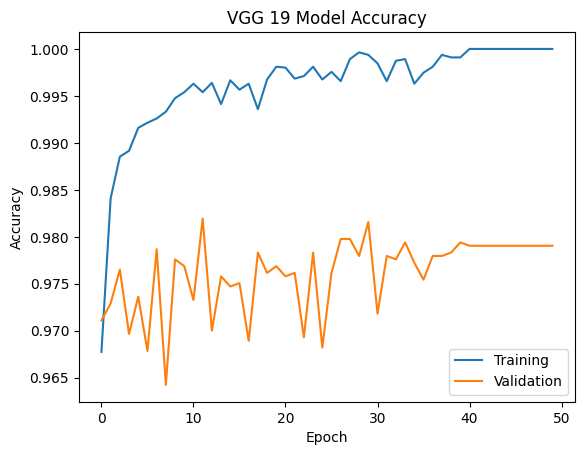

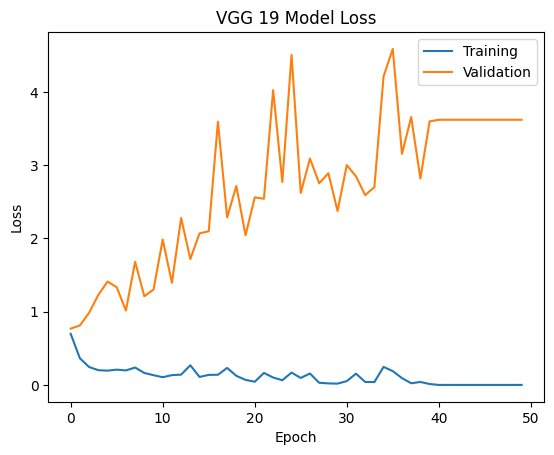

In [73]:
# Plot the training and validation accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('VGG 19 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.savefig('vgg19_accuracy.png', dpi=300) # Save plot as PNG
plt.show()

# Plot the training and validation loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('VGG 19 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.savefig('vgg19_loss.png', dpi=300) # Save plot as PNG
plt.show()

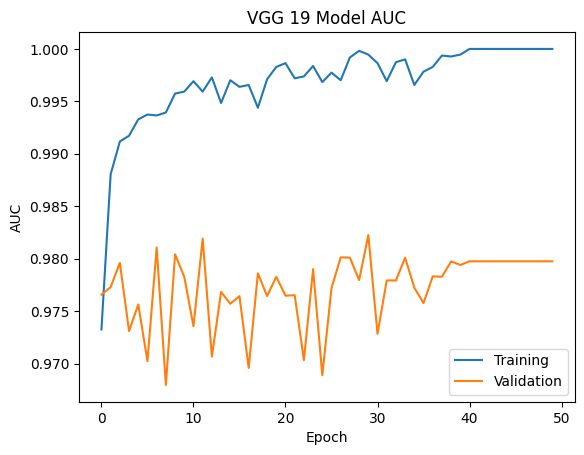

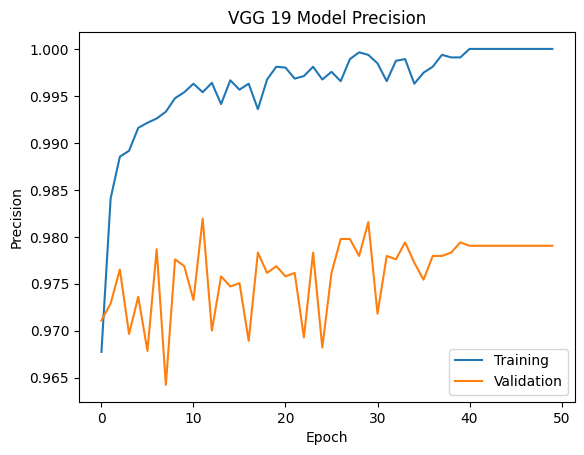

In [74]:
# Plot the training and validation auc
plt.plot(history4.history['auc'])
plt.plot(history4.history['val_auc'])
plt.title('VGG 19 Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(['Training', 'Validation'])
plt.savefig('vgg19_auc.png', dpi=300) # Save plot as PNG
plt.show()

# Plot the training and validation precision
plt.plot(history4.history['precision'])
plt.plot(history4.history['val_precision'])
plt.title('VGG 19 Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(['Training', 'Validation'])
plt.savefig('vgg19_precision.png', dpi=300) # Save plot as PNG
plt.show()

In [75]:
import pandas as pd

# Assuming 'history1' is the History object returned from model.fit()
metrics = pd.DataFrame(history3.history)

# Save the training history to a CSV file
metrics.to_csv('/content/sample_data/VGG.csv', index=False)

# Save the model itself
model4.save('/content/sample_data/VGG.h5')


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception

# Specify the input image size
image_size = 224
 # You can adjust this to match your dataset's image size

# Load the Xception model with pre-trained weights (include_top=False excludes the fully connected layers)
xception = Xception(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Display a summary of the Xception model
xception.summary()


In [80]:
model5 = xception.output
model5 = tf.keras.layers.AveragePooling2D(pool_size=(4, 4))(model5)
model5 = tf.keras.layers.Flatten(name="flatten")(model5)
model5 = tf.keras.layers.Dense(128, activation="relu")(model5)
model5 = tf.keras.layers.Dropout(0.6)(model5)
model5 = tf.keras.layers.Dense(2, activation='softmax')(model5)
model5 = tf.keras.models.Model(inputs=xception.input, outputs=model5)


In [81]:
model5.compile( optimizer='adam',
    loss='binary_crossentropy',
    metrics=METRICS)

In [82]:
history5=model5.fit(xtrain,ytrain,epochs=50,validation_data=(xtest,ytest))

Epoch 1/50
346/346 [==============================] - 83s 161ms/step - loss: 0.1356 - accuracy: 0.9569 - precision: 0.9569 - recall: 0.9569 - auc: 0.9857 - val_loss: 0.6202 - val_accuracy: 0.8472 - val_precision: 0.8472 - val_recall: 0.8472 - val_auc: 0.8950
Epoch 2/50
346/346 [==============================] - 52s 152ms/step - loss: 0.0671 - accuracy: 0.9786 - precision: 0.9786 - recall: 0.9786 - auc: 0.9946 - val_loss: 0.1453 - val_accuracy: 0.9639 - val_precision: 0.9639 - val_recall: 0.9639 - val_auc: 0.9790
Epoch 3/50
346/346 [==============================] - 53s 152ms/step - loss: 0.0320 - accuracy: 0.9898 - precision: 0.9898 - recall: 0.9898 - auc: 0.9978 - val_loss: 0.0955 - val_accuracy: 0.9801 - val_precision: 0.9801 - val_recall: 0.9801 - val_auc: 0.9903
Epoch 4/50
346/346 [==============================] - 53s 152ms/step - loss: 0.0361 - accuracy: 0.9907 - precision: 0.9907 - recall: 0.9907 - auc: 0.9967 - val_loss: 0.0598 - val_accuracy: 0.9819 - val_precision: 0.9819 - v

In [83]:
# Make predictions using model5
pred5 = model5.predict(xtest)
pred5 = np.argmax(pred5, axis=1)
actual_label5 = np.argmax(ytest, axis=1)
print(classification_report(actual_label5, pred5, target_names=labels))


87/87 [==============================] - 4s 37ms/step
              precision    recall  f1-score   support

       COVID       0.99      0.99      0.99       717
      Normal       1.00      1.00      1.00      2051

    accuracy                           0.99      2768
   macro avg       0.99      0.99      0.99      2768
weighted avg       0.99      0.99      0.99      2768



In [84]:
accuracy_score(actual_label5, pred5)

0.994942196531792

In [85]:
import pandas as pd

# Assuming 'history1' is the History object returned from model.fit()
metrics = pd.DataFrame(history5.history)

# Save the training history to a CSV file
metrics.to_csv('/content/sample_data/XCEPTION.csv', index=False)

# Save the model itself
model5.save('/content/sample_data/XCEPTION.h5')

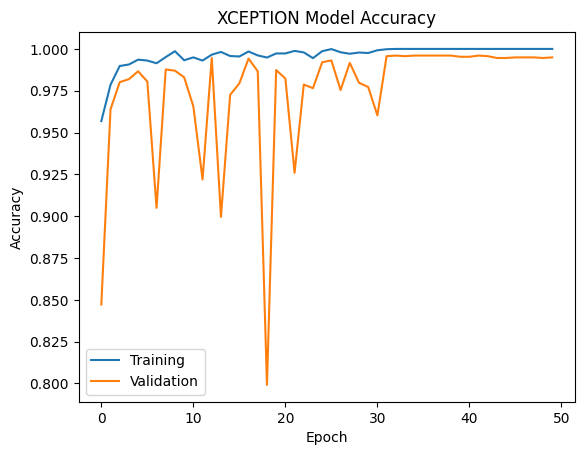

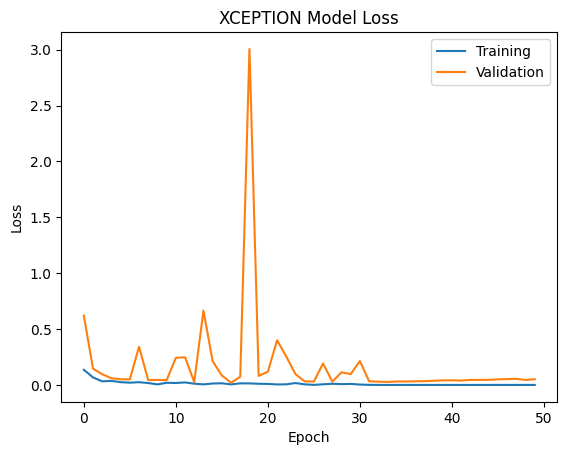

In [86]:
# Plot the training and validation accuracy
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('XCEPTION Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.savefig('XCEPTION_accuracy.png', dpi=300) # Save plot as PNG
plt.show()

# Plot the training and validation loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('XCEPTION Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.savefig('XCEPTION_loss.png', dpi=300) # Save plot as PNG
plt.show()

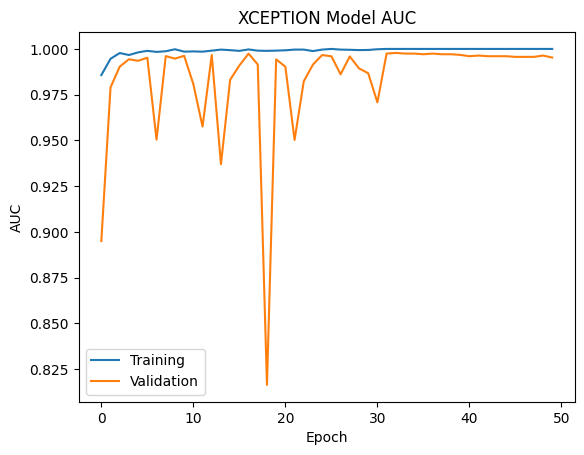

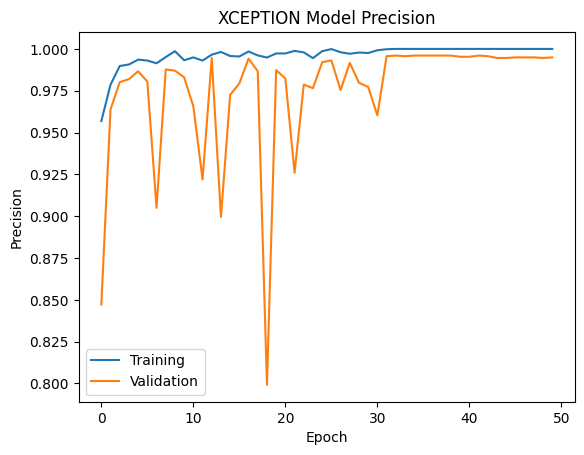

In [87]:
# Plot the training and validation auc
plt.plot(history5.history['auc'])
plt.plot(history5.history['val_auc'])
plt.title('XCEPTION Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(['Training', 'Validation'])
plt.savefig('XCEPTION_auc.png', dpi=300) # Save plot as PNG
plt.show()

# Plot the training and validation precision
plt.plot(history5.history['precision'])
plt.plot(history5.history['val_precision'])
plt.title('XCEPTION Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(['Training', 'Validation'])
plt.savefig('XCEPTION_precision.png', dpi=300) # Save plot as PNG
plt.show()

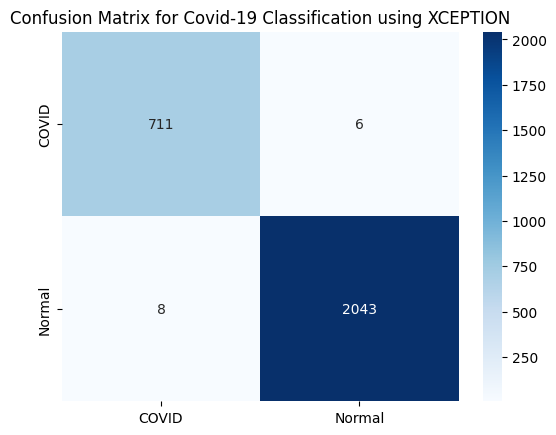

In [88]:
Cm=confusion_matrix(actual_label5,pred5)
ax=plt.axes()
sns.heatmap(Cm, cmap='Blues' ,annot=True,fmt='d',
           annot_kws={'size':10},
           xticklabels=labels,
           yticklabels=labels,
           ax=ax
           )

plt.title("Confusion Matrix for Covid-19 Classification using XCEPTION")
plt.savefig('XCEPTION_confusion.png', dpi=300) # Save plot as PNG
plt.show()

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
rn = ResNet50(input_shape=(150,150,3), weights='imagenet', include_top=False)

In [ ]:
for layer in rn.layers:
    layer.trainable = False
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model4 = Sequential()
model4.add(rn)
model4.add(Flatten())
model4.add(Dense(4,activation="softmax"))

In [ ]:
model4 = rn.output
model4 = tf.keras.layers.AveragePooling2D(pool_size=(4, 4))(model4)
model4 = tf.keras.layers.Flatten(name="flatten")(model4)
model4 = tf.keras.layers.Dense(128, activation="relu")(model4)
model4 = tf.keras.layers.Dropout(0.6)(model4)
model4 = tf.keras.layers.Dense(4, activation='softmax')(model4)
model4 = tf.keras.models.Model(inputs=rn.input, outputs=model4)

In [ ]:
model4.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=METRICS)

In [ ]:
history4=model4.fit(xtrain,ytrain,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
530/530 [==============================] - 38s 66ms/step - loss: 0.4890 - accuracy: 0.9592 - precision: 0.9226 - recall: 0.9133 - auc: 0.9844 - val_loss: 0.7885 - val_accuracy: 0.9439 - val_precision: 0.8901 - val_recall: 0.8847 - val_auc: 0.9643
Epoch 2/20
530/530 [==============================] - 34s 63ms/step - loss: 0.4161 - accuracy: 0.9632 - precision: 0.9285 - recall: 0.9241 - auc: 0.9820 - val_loss: 0.9091 - val_accuracy: 0.9305 - val_precision: 0.8626 - val_recall: 0.8590 - val_auc: 0.9516
Epoch 3/20
530/530 [==============================] - 33s 63ms/step - loss: 0.2979 - accuracy: 0.9686 - precision: 0.9386 - recall: 0.9354 - auc: 0.9870 - val_loss: 0.9221 - val_accuracy: 0.9248 - val_precision: 0.8504 - val_recall: 0.8483 - val_auc: 0.9488
Epoch 4/20
530/530 [==============================] - 33s 63ms/step - loss: 0.2491 - accuracy: 0.9723 - precision: 0.9455 - recall: 0.9436 - auc: 0.9892 - val_loss: 0.7955 - val_accuracy: 0.9346 - val_precision: 0.8702 - val_r

In [ ]:
pred4 = model4.predict(xtest)
pred4 = np.argmax(pred4, axis=1)
actual_label4 = np.argmax(ytest, axis=1)
print(classification_report(actual_label4, pred4, target_names = labels))

133/133 [==============================] - 6s 48ms/step
                 precision    recall  f1-score   support

          COVID       0.92      0.85      0.89       733
   Lung_Opacity       0.81      0.87      0.84      1217
         Normal       0.90      0.89      0.90      1992
Viral Pneumonia       0.95      0.92      0.93       298

       accuracy                           0.88      4240
      macro avg       0.90      0.88      0.89      4240
   weighted avg       0.88      0.88      0.88      4240



In [ ]:
accuracy_score(actual_label4, pred4)

0.8808962264150944

In [ ]:
import pandas as pd

# Assuming 'history1' is the History object returned from model.fit()
metrics = pd.DataFrame(history4.history)

# Save the training history to a CSV file
metrics.to_csv('/content/sample_data/RES.csv', index=False)

# Save the model itself
model4.save('/content/sample_data/RES.h5')


## Comparison and Graphs of Different Model Types

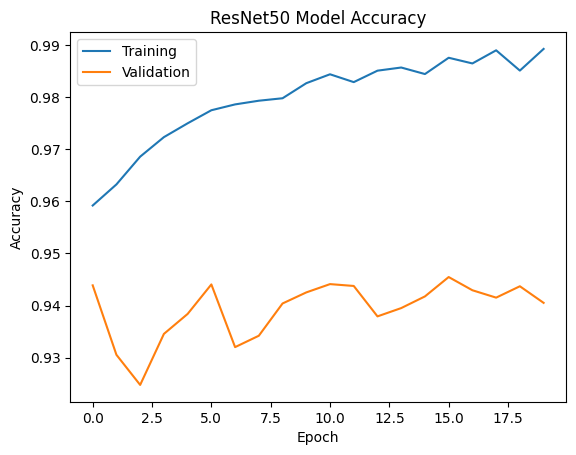

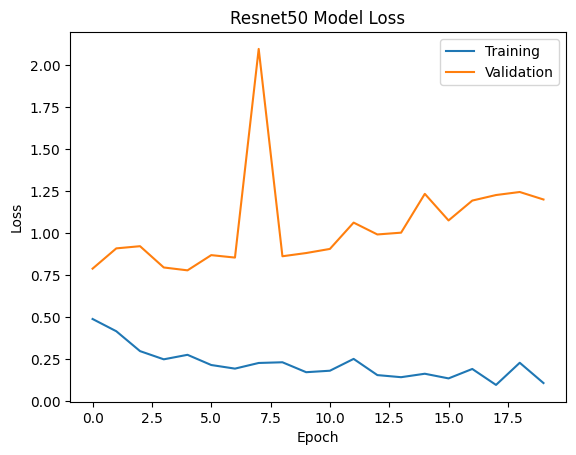

In [ ]:
# Plot the training and validation accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('ResNet50 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.savefig('Resnet50_accuracy.png', dpi=300) # Save plot as PNG
plt.show()

# Plot the training and validation loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Resnet50 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.savefig('resnet_loss.png', dpi=300) # Save plot as PNG
plt.show()

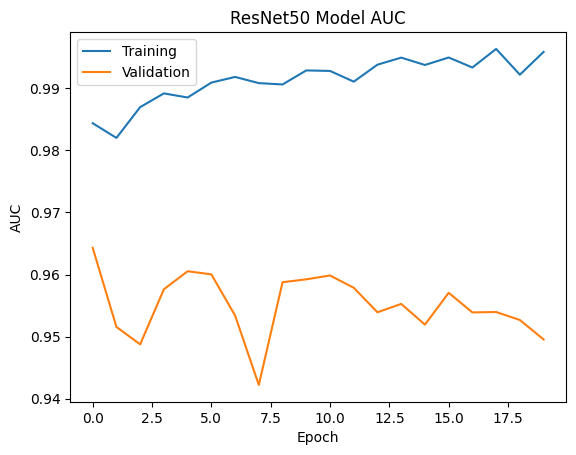

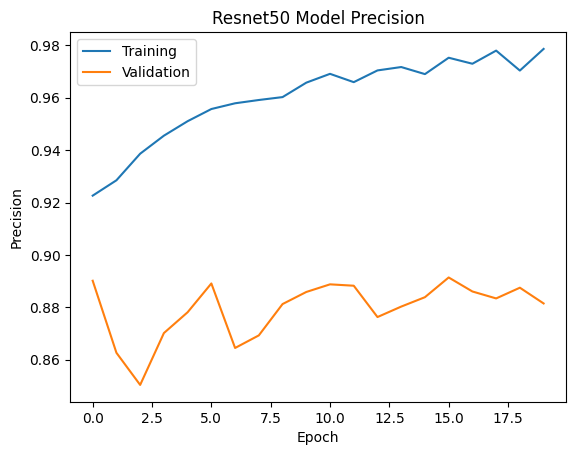

In [ ]:
# Plot the training and validation auc
plt.plot(history4.history['auc'])
plt.plot(history4.history['val_auc'])
plt.title('ResNet50 Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(['Training', 'Validation'])
plt.savefig('vgg19_auc.png', dpi=300) # Save plot as PNG
plt.show()

# Plot the training and validation precision
plt.plot(history4.history['precision'])
plt.plot(history4.history['val_precision'])
plt.title('Resnet50 Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(['Training', 'Validation'])
plt.savefig('vgg19_precision.png', dpi=300) # Save plot as PNG
plt.show()

In [101]:
scores  = model.evaluate(xtest, ytest, verbose=1)
scores3 = model3.evaluate(xtest, ytest, verbose=1)
scores4 = model4.evaluate(xtest, ytest, verbose=1)
scores5 = model5.evaluate(xtest, ytest, verbose=1)



87/87 [==============================] - 4s 41ms/step - loss: 0.0507 - accuracy: 0.9949 - precision: 0.9949 - recall: 0.9949 - auc: 0.9953


## Densenet

In [102]:
precision = scores[0]
f1_score = scores[1]
recall = scores[2]
accuracy = scores[3]

## CNN

In [103]:
precision3 = scores3[0]
f1_score3 = scores3[1]
recall3 = scores3[2]
accuracy3 = scores3[3]

## Efficient Net B7

In [104]:
precision4 = scores4[0]
f1_score4 = scores4[1]
recall4 = scores4[2]
accuracy4 = scores4[3]

## VGG 19

In [105]:
precision5 = scores5[0]
f1_score5 = scores5[1]
recall5 = scores5[2]
accuracy5 = scores5[3]

In [106]:
import pandas as pd

eval_df = pd.DataFrame(columns=['Model','Precision', 'F1 Score', 'Recall', 'Accuracy'])


In [107]:
eval_df = eval_df.append({'Model' : 'DenseNet-121', 'Precision': precision, 'F1 Score': f1_score, 'Recall': recall, 'Accuracy': accuracy}, ignore_index=True)
eval_df = eval_df.append({'Model' : 'Inception V3', 'Precision': precision3, 'F1 Score': f1_score3, 'Recall': recall3, 'Accuracy': accuracy3}, ignore_index=True)
eval_df = eval_df.append({'Model' : 'VGG-19', 'Precision': precision4, 'F1 Score': f1_score4, 'Recall': recall4, 'Accuracy': accuracy4}, ignore_index=True)
eval_df = eval_df.append({'Model' : 'Xception', 'Precision': precision5, 'F1 Score': f1_score5, 'Recall': recall5, 'Accuracy': accuracy5}, ignore_index=True)


In [108]:
eval_df

,Model,Precision,F1 Score,Recall,Accuracy
0,DenseNet-121,0.063712,0.981936,0.981936,0.981936
1,Inception V3,0.033336,0.986633,0.986633,0.986633
2,VGG-19,3.621407,0.979046,0.979046,0.979046
3,Xception,0.050732,0.994942,0.994942,0.994942


In [ ]:
import csv
eval_df.to_csv('comparison_metrics.csv', index=False)

## Ensemble Learning

In [109]:
pred = model.predict(xtest)
pred1=model3.predict(xtest)
pred2 = model4.predict(xtest)
pred3=model5.predict(xtest)
ensemble_preds = np.average([pred,pred1,pred2,pred3], axis=0)
final_preds = np.argmax(ensemble_preds, axis=1)
actual_label_final = np.argmax(ytest, axis=1)
print(classification_report(actual_label_final, final_preds,target_names = labels))

87/87 [==============================] - 3s 38ms/step
              precision    recall  f1-score   support

       COVID       1.00      0.99      0.99       717
      Normal       1.00      1.00      1.00      2051

    accuracy                           1.00      2768
   macro avg       1.00      1.00      1.00      2768
weighted avg       1.00      1.00      1.00      2768



In [111]:
accuracy_score(actual_label_final, final_preds)

0.9967485549132948

In [ ]:
history5=

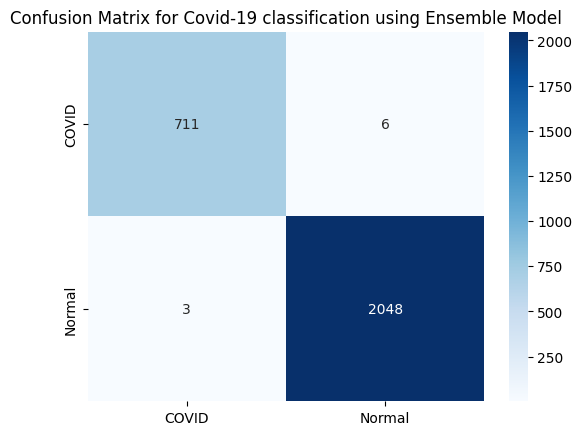

In [113]:
Cm4=confusion_matrix(actual_label_final,final_preds)
ax3=plt.axes()
sns.heatmap(Cm4, cmap='Blues' ,annot=True,fmt='d',
           annot_kws={'size':10},
           xticklabels=labels,
           yticklabels=labels
           )

plt.title("Confusion Matrix for Covid-19 classification using Ensemble Model")
plt.savefig('ensemble_confusion.png', dpi=300) # Save plot as PNG
plt.show()

In [ ]:
ensemble_preds.fit(xtrain,ytrain,epochs=50,validation_data=(xtest,ytest))

AttributeError: ignored

In [ ]:
import pickle
with open('/kaggle/input/model-training/Model Training/ensemble_history.pkl', 'rb') as f:
    final = pickle.load(f)

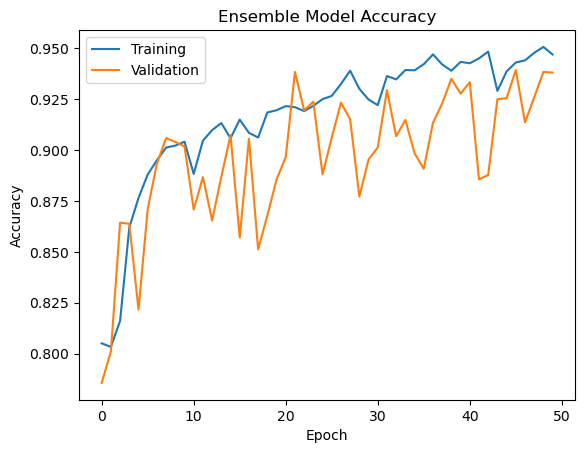

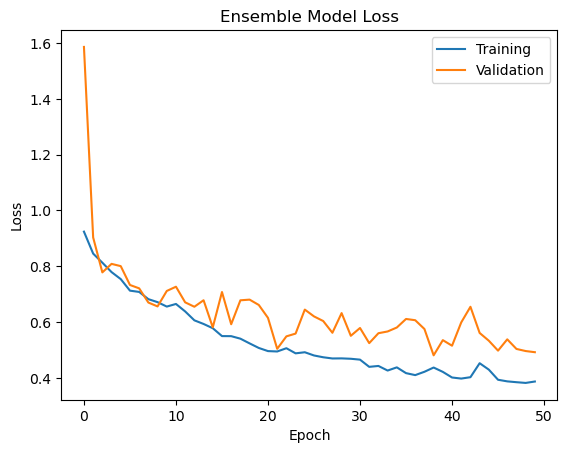

In [ ]:
# Plot the training and validation accuracy
plt.plot(final['accuracy'])
plt.plot(final['val_accuracy'])
plt.title('Ensemble Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.savefig('ensemble_accuracy2.png', dpi=300) # Save plot as PNG
plt.show()

# Plot the training and validation loss
plt.plot(final['loss'])
plt.plot(final['val_loss'])
plt.title('Ensemble Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.savefig('ensemble_loss2.png', dpi=300) # Save plot as PNG
plt.show()

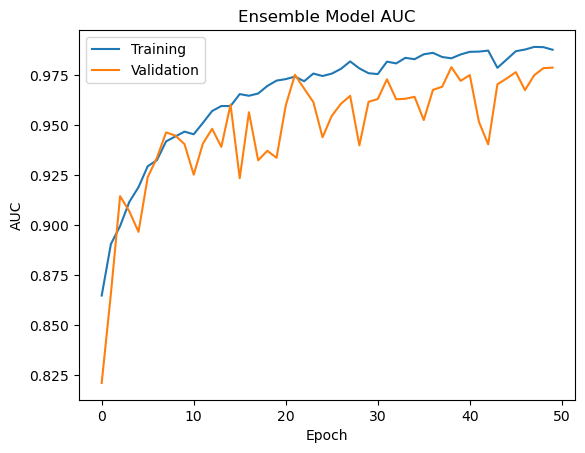

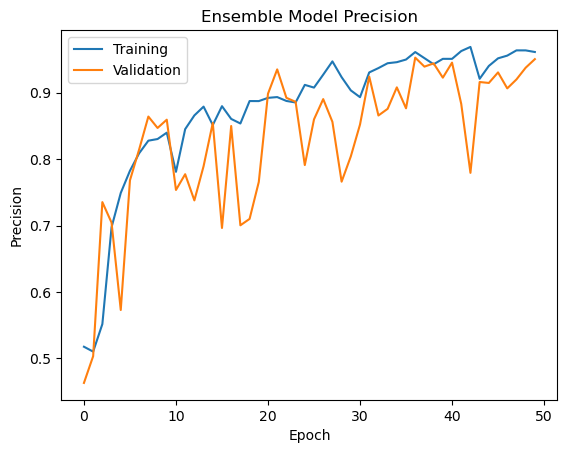

In [ ]:
# Plot the training and validation auc
plt.plot(final['auc'])
plt.plot(final['val_auc'])
plt.title('Ensemble Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(['Training', 'Validation'])
plt.savefig('ensemble_auc2.png', dpi=300) # Save plot as PNG
plt.show()

# Plot the training and validation precision
plt.plot(final['precision'])
plt.plot(final['val_precision'])
plt.title('Ensemble Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(['Training', 'Validation'])
plt.savefig('ensemble_precision2.png', dpi=300) # Save plot as PNG
plt.show()

## Mean Square Error

In [ ]:
from sklearn.metrics import mean_squared_error

pred_final1 = (pred + pred1 + pred2 + pred3)/4.0

# printing the mean squared error between real value and predicted value
print(mean_squared_error(ytest, pred_final1))

0.014353122


## Prediction

In [ ]:
def imagePrediction(upload):
    for name, fileinfo  in uploader.value.items():
        image = Image.open(io.BytesIO(fileinfo['content']))

    images = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    images = cv2.resize(images,(150, 150))
    images = images.reshape(1, 150, 150, 3)
    prd = model2.predict(images)
    prd = np.argmax(prd, axis = 1)[0]


    if prd == 0:
        prd = "Final AD JPEG"
    elif prd == 1:
        prd = "Final CN JPEG"
    elif prd == 2:
        prd = "Final EMCI JPEG"
    elif prd == 3:
        prd = "Final LMCI JPEG"
    elif prd == 4:
        prd = "Final MCI JPEG"
    if prd!=1:
        print(f'Model Predict That is  a {prd}')


In [ ]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [ ]:
button = widgets.Button(description= "Predict")
out = widgets.Output()

def on_button_click(_):
    with out:
        clear_output()
        try:
            imagePrediction(uploader)
        except:
            print("Please Enter the Correct Image files")


button.on_click(on_button_click)
widgets.VBox([button, out])
